84
237
397
518
692
846
954
1168
1215
951
1021
993
940
1044
833
808
767
690
625
588
543
499
455
428
353
321
307
514
188
36
10
0
Добавлено пикселей: 84
Добавлено пикселей: 237
Добавлено пикселей: 397
Добавлено пикселей: 518
Добавлено пикселей: 692
Добавлено пикселей: 846
Добавлено пикселей: 954
Добавлено пикселей: 1168
Добавлено пикселей: 1215
Добавлено пикселей: 951
Добавлено пикселей: 1021
Добавлено пикселей: 993
Добавлено пикселей: 940
Добавлено пикселей: 1044
Добавлено пикселей: 833
Добавлено пикселей: 808
Добавлено пикселей: 767
Добавлено пикселей: 690
Добавлено пикселей: 625
Добавлено пикселей: 588
Добавлено пикселей: 543
Добавлено пикселей: 499
Добавлено пикселей: 455
Добавлено пикселей: 428
Добавлено пикселей: 353
Добавлено пикселей: 321
Добавлено пикселей: 307
Добавлено пикселей: 514
Добавлено пикселей: 188
Добавлено пикселей: 36
Добавлено пикселей: 10
Добавлено пикселей: 0
Добавлено пикселей: 99
Добавлено пикселей: 261
Добавлено пикселей: 423
Добавлено пикселей: 585
Добавлено п

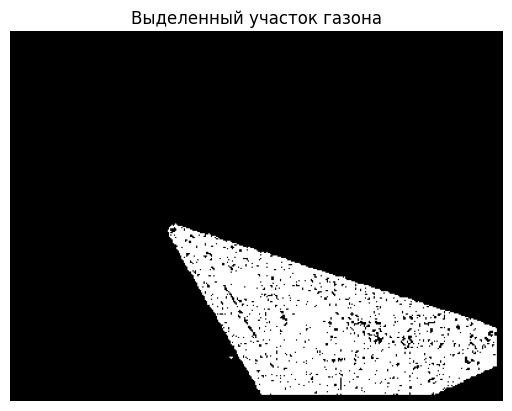

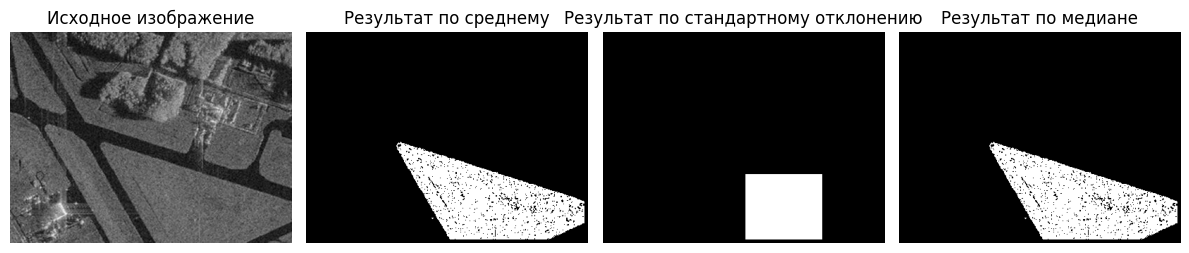

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

plt.imshow(image_gray, cmap="gray")

import math
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
                                                            
    if abs(av_val - img[point]) <= T:
        return True
    
    return False


def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        print(count)
        mask += local_mask
        
    return mask*255

seed_point = (250, 250)  
r = 5                     
T = 15                    
mask = region_growing(image_gray, seed_point, homo_average, r, T)

plt.imshow(mask, cmap="gray")
plt.title("Выделенный участок газона")
plt.axis('off')

def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(mask)
    return abs(av_val - img[point]) <= T








def homo_std_dev(img, mask, point, T):
    region_pixels = img[mask > 0]
    if region_pixels.size == 0:
        return False
    std_dev = np.std(region_pixels)
    return std_dev <= T


def homo_median(img, mask, point, T):
    region_pixels = img[mask > 0]
    if region_pixels.size == 0:
        return False
    median_val = np.median(region_pixels)
    return abs(median_val - img[point]) <= T


def region_growing(image, seed_point, homo_fun, r, T):
    mask = np.zeros(image.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image.shape, np.uint8)
        for i in range(r, image.shape[0] - r):
            for j in range(r, image.shape[1] - r):
                if mask[i, j] == 0 and mask[i - r:i + r, j - r:j + r].sum() > 0:
                    if homo_fun(image, mask, (i, j), T):
                        local_mask[i, j] = 1
        count = np.count_nonzero(local_mask)
        print(f"Добавлено пикселей: {count}")
        mask += local_mask
        
    return mask * 255


seed_point = (250, 250)  
r = 5                     
T_average = 15                    
T_std_dev = 10  
T_median = 15   


mask_average = region_growing(image_gray, seed_point, homo_average, r, T_average)


mask_std_dev = region_growing(image_gray, seed_point, homo_std_dev, r, T_std_dev)


mask_median = region_growing(image_gray, seed_point, homo_median, r, T_median)


plt.figure(figsize=(12, 8))

plt.subplot(1, 4, 1)
plt.imshow(image_gray, cmap="gray")
plt.title("Исходное изображение")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(mask_average, cmap="gray")
plt.title("Результат по среднему")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(mask_std_dev, cmap="gray")
plt.title("Результат по стандартному отклонению")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(mask_median, cmap="gray")
plt.title("Результат по медиане")
plt.axis('off')

plt.tight_layout()





plt.show()


